In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('insurance_claims.csv')

In [2]:
feats = ['policy_state','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported','incident_type']
df_final = pd.get_dummies(df, columns=feats, drop_first=True)

In [3]:
df_final.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,...,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_Y,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft
0,328,48,521585,2014-10-17,250/500,1000,1406.91,0,466132,53300,...,0,0,0,0,0,0,1,0,1,0
1,228,42,342868,2006-06-27,250/500,2000,1197.22,5000000,468176,0,...,0,0,0,0,0,0,1,0,0,1
2,134,29,687698,2000-09-06,100/300,2000,1413.14,5000000,430632,35100,...,0,0,0,0,0,0,0,0,0,0
3,256,41,227811,1990-05-25,250/500,2000,1415.74,6000000,608117,48900,...,0,1,0,0,0,0,1,0,1,0
4,228,44,367455,2014-06-06,500/1000,1000,1583.91,6000000,610706,66000,...,0,0,0,0,0,0,0,0,0,1


In [4]:
X = df_final.drop(['fraud_reported_Y','policy_csl','policy_bind_date','incident_date'],axis=1).values
y = df_final['fraud_reported_Y'].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

def make_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(3, kernel_initializer = 'uniform', activation = 'relu', input_dim=X_train.shape[1]))
    classifier.add(Dense(3, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = make_classifier('adam')
classifier.fit(X_train, y_train, batch_size = 10, epochs = 20)

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/20
700/700 [==============================] - 1s 757us/step - loss: 0.6862 - acc: 0.7329
Epoch 2/20
700/700 [==============================] - 0s 139us/step - loss: 0.6668 - acc: 0.7471
Epoch 3/20
700/700 [==============================] - 0s 138us/step - loss: 0.6162 - acc: 0.7471
Epoch 4/20
700/700 [==============================] - 0s 256us/step - loss: 0.5429 - acc: 0.7471
Epoch 5/20
700/700 [==============================] - 0s 268us/step - loss: 0.4832 - acc: 0.7471
Epoch 6/20
700/700 [==============================] - 0s 141us/step - loss: 0.4339 - acc: 0.7471
Epoch 7/20
700/700 [==============================] - 0s 136us/step - loss: 0.3949 - acc: 0.7471
Epoch 8/20
700/700 [==============================] - 0s 136us/step - loss: 0.3624 - acc: 0.7471
Epoch 9/20
700/700 [==============================] - 0s 273us/step - loss: 0.3368 - acc: 0.7471
Epoch 10/20
700/700 [==============================] - 0s 202us/step - loss: 0.3164 - acc: 0.7471
Epoch 11/20
700/700 [========

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
y_pred = (y_pred > 0.5)

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [11]:
cm

array([[179,  51],
       [ 30,  40]])

In [12]:
from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score

# val_classifier = KerasClassifier(build_fn = make_classifier('adam'), batch_size=10, nb_epoch=20)
# accuracies = cross_val_score(estimator = val_classifier,
#                              X = X_train,
#                              y = y_train,
#                              cv = 10,
#                              n_jobs = 1)
# mean = accuracies.mean()
# mean

In [13]:
# variance = accuracies.var()
# variance

In [14]:
from sklearn.model_selection import GridSearchCV

grid_classifier = KerasClassifier(build_fn = make_classifier)

params = {
    'batch_size':[20,35],
    'nb_epoch': [20, 50],
    'optimizer':['adam','rmsprop']
}

grid_search = GridSearchCV(estimator=grid_classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=10)

grid_search = grid_search.fit(X_train, y_train)

Epoch 1/1
630/630 [==============================] - 0s 777us/step - loss: 0.6888 - acc: 0.7476
Epoch 1/1
630/630 [==============================] - 0s 768us/step - loss: 0.6894 - acc: 0.7381
Epoch 1/1
630/630 [==============================] - 0s 746us/step - loss: 0.6894 - acc: 0.7492
Epoch 1/1
630/630 [==============================] - 0s 728us/step - loss: 0.6888 - acc: 0.7444
Epoch 1/1
630/630 [==============================] - 1s 1ms/step - loss: 0.6894 - acc: 0.7349
Epoch 1/1
630/630 [==============================] - 1s 920us/step - loss: 0.6894 - acc: 0.7254
Epoch 1/1
630/630 [==============================] - 1s 910us/step - loss: 0.6893 - acc: 0.7444
Epoch 1/1
630/630 [==============================] - 1s 938us/step - loss: 0.6888 - acc: 0.7460
Epoch 1/1
630/630 [==============================] - 1s 1ms/step - loss: 0.6896 - acc: 0.7238
Epoch 1/1
630/630 [==============================] - 1s 1ms/step - loss: 0.6885 - acc: 0.7540
Epoch 1/1
630/630 [===========================

In [15]:
grid_search.best_params_

{'batch_size': 20, 'nb_epoch': 20, 'optimizer': 'adam'}

In [16]:
grid_search.best_score_

0.7471428571428571

In [19]:
best_classifier = grid_search.best_estimator_
history = best_classifier.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
700/700 [==============================] - 4s 5ms/step - loss: 0.6849 - acc: 0.7400
Epoch 2/20
700/700 [==============================] - 0s 375us/step - loss: 0.6549 - acc: 0.7471
Epoch 3/20
700/700 [==============================] - 0s 517us/step - loss: 0.5872 - acc: 0.7471
Epoch 4/20
700/700 [==============================] - 0s 420us/step - loss: 0.5108 - acc: 0.7471
Epoch 5/20
700/700 [==============================] - 0s 514us/step - loss: 0.4561 - acc: 0.7471
Epoch 6/20
700/700 [==============================] - 0s 657us/step - loss: 0.4086 - acc: 0.7471
Epoch 7/20
700/700 [==============================] - 0s 570us/step - loss: 0.3692 - acc: 0.7471 0s - loss: 0.3850 - acc: 
Epoch 8/20
700/700 [==============================] - 0s 370us/step - loss: 0.3371 - acc: 0.7471
Epoch 9/20
700/700 [==============================] - 0s 570us/step - loss: 0.3124 - acc: 0.7471
Epoch 10/20
700/700 [==============================] - 0s 409us/step - loss: 0.2927 - acc: 0.7471
Epoch

In [21]:
history_dict = history.history
history_dict.keys()

['acc', 'loss']

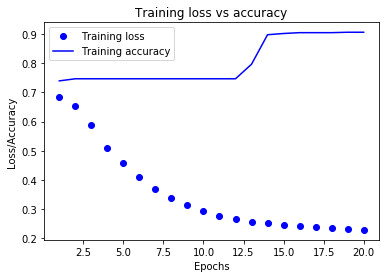

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.title('Training loss vs accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [24]:
y_pred = best_classifier.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
cm

array([[182,  48],
       [ 30,  40]])